In [1]:
import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
from flylib import util
import figurefirst as fifi
import scipy.signal
import local_project_functions as lpf
from IPython.display import SVG,display

In [2]:
import networkx as nx

In [3]:
%matplotlib inline

In [4]:
flynumbers = list(range(1389,1402))
flylist = [flb.NetFly(fnum,rootpath='/media/imager/FlyDataD/FlyDB/') for fnum in flynumbers]
l = [fly.open_signals() for fly in flylist]
#fly = flylist[4]
#fly.open_signals()

In [20]:
def get_mutual_info(flylist,xkey,ykey):
    """return a 'mutual information metric' between two signals,
    based on the mean """
    group_hist = get_group_hist(flylist,xkey,ykey)
    pxy = group_hist/(np.sum(group_hist))
    px = np.sum(pxy,axis = 1)
    py = np.sum(pxy,axis = 0)
    px_py = px[:,None] * py[None,:]
    nzs = pxy>0
    return np.sum(pxy[nzs] * np.log(pxy[nzs]/px_py[nzs]))
    #plt.imshow(group_hist)
    
def get_correlation(flylist,xkey,ykey):
    """return the mean correlation coef accross flies"""
    ccofs = [np.corrcoef(fly.non_neg_signals[xkey],
                fly.non_neg_signals[ykey])[0,1] for fly in flylist]
    return np.median(ccofs),ccofschri

In [10]:
#make_adj_ca_singals(fly,sorted_keys)

NameError: name 'make_adj_ca_singals' is not defined

In [11]:
plt.hist(make_adj_ca_singals(fly,sorted_keys))

NameError: name 'make_adj_ca_singals' is not defined

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


In [12]:
state_mtrx = np.vstack([fly.normed_signals[key] for key in sorted_keys])

NameError: name 'sorted_keys' is not defined

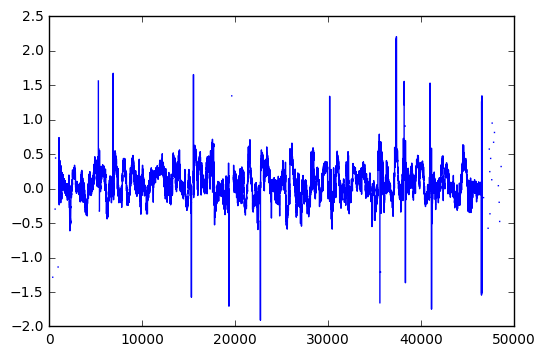

In [122]:
plt.plot(lmr)

In [21]:
lmr = np.array(fly.left_amp) - np.array(fly.right_amp)
thresh = 1 
criterion = np.squeeze(np.rad2deg(lmr)>thresh)
#criterion = np.ones_like(lmr).astype(bool)[:,0]
state_mtrx = np.vstack([np.array(fly.normed_signals[key])[criterion] for key in sorted_keys])

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


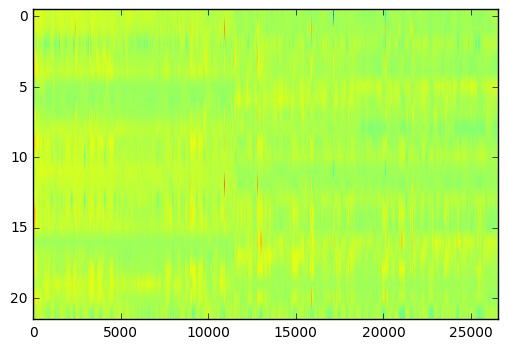

In [119]:
plt.imshow(state_mtrx,aspect = 'auto')

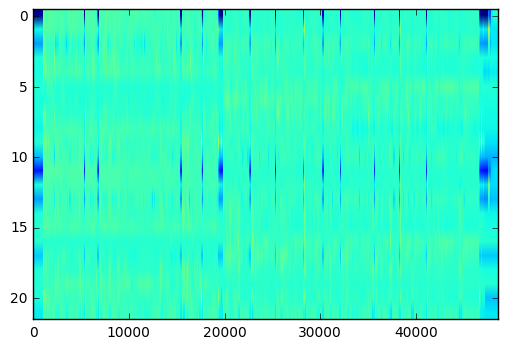

In [113]:
plt.imshow(state_mtrx,aspect = 'auto')

In [128]:
set(fly.experimental_block)

{'cl_blocks, g_x=-1, g_y=-4 b_x=-8, b_y=0',
 'cl_blocks, g_x=-1, g_y=-4 b_x=0, b_y=0',
 'cl_blocks, g_x=-1, g_y=-4 b_x=8, b_y=0',
 'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0',
 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0',
 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0',
 'cl_blocks, g_x=-1, g_y=4 b_x=-8, b_y=0',
 'cl_blocks, g_x=-1, g_y=4 b_x=0, b_y=0',
 'cl_blocks, g_x=-1, g_y=4 b_x=8, b_y=0',
 'ol_blocks, g_x=-12, g_y=0 b_x=0, b_y=0',
 'ol_blocks, g_x=0, g_y=-4 b_x=0, b_y=0',
 'ol_blocks, g_x=0, g_y=0 b_x=0, b_y=0',
 'ol_blocks, g_x=0, g_y=4 b_x=0, b_y=0',
 'ol_blocks, g_x=12, g_y=0 b_x=0, b_y=0',
 'ol_stripe, g_x=-70, g_y=0 b_x=0, b_y=0',
 'ol_stripe, g_x=70, g_y=0 b_x=0, b_y=0',
 'pretrial_stripe_fix',
 'trials_ended'}

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:48: RuntimeWarning: invalid value encountered in less
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:48: RuntimeWarning: invalid value encountered in greater
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:52: RuntimeWarning: invalid value encountered in divide


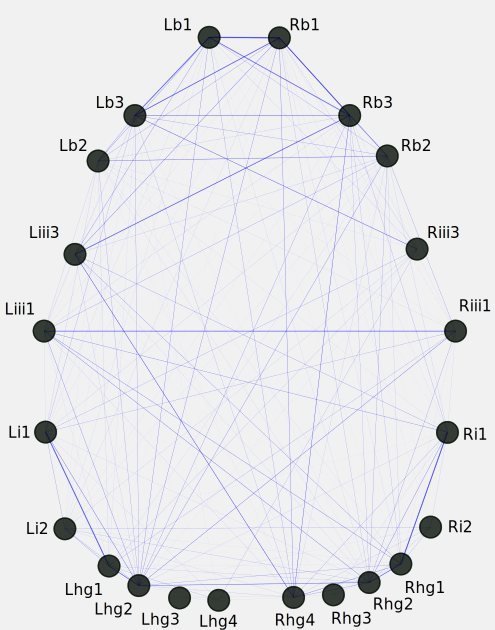

In [22]:
layout = fifi.FigureLayout('layouts/graph_layout.svg',make_mplfigures=True)

sorted_keys = sorted(fly.spikestates.keys())

cull_list = [('left', 'bkg'),('right', 'bkg'),
            ('left', 'iii24'),('right', 'iii24'),
            ('left', 'nm'),('right', 'nm'),
            ('left', 'pr'),('right', 'pr'),
            ('left', 'tpd'),('right', 'tpd')]

for cull in cull_list:
    sorted_keys.remove(cull)
#[sorted_keys.remove(cull) for cull in cull_list]

def make_adj_binary_corr(fly,sorted_keys):
    lmr = np.array(fly.left_amp) - np.array(fly.right_amp)
    thresh = 10 
    #criterion = np.rad2deg(lmr)>thresh
    criterion = fly.experimental_block == 'cl_blocks, g_x=-1, g_y=4 b_x=-8, b_y=0'
    criterion &= fly.experimental_block == 'cl_blocks, g_x=-1, g_y=-4 b_x=-8, b_y=0'
    criterion &= fly.experimental_block == 'cl_blocks, g_x=-1, g_y=4 b_x=8, b_y=0'
    criterion &= fly.experimental_block == 'cl_blocks, g_x=-1, g_y=-4 b_x=8, b_y=0'
    criterion &= fly.experimental_block == 'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0'
    criterion &= fly.experimental_block == 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0'
    criterion &= fly.experimental_block == 'cl_blocks, g_x=-1, g_y=4 b_x=0, b_y=0'
    criterion &= fly.experimental_block == 'cl_blocks, g_x=-1, g_y=-4 b_x=0, b_y=0'
    
    criterion = np.squeeze(criterion)
    state_mtrx = np.vstack([fly.spikestates[key][criterion] for key in sorted_keys])
    centered_mtrx = state_mtrx - np.mean(state_mtrx,axis = 1)[:,None]
    std_mtrx = centered_mtrx/np.std(centered_mtrx,axis = 1)[:,None]
    cor_mtrx = np.dot(std_mtrx,std_mtrx.T)
    return cor_mtrx

def make_adj_mutual_info(fly,sorted_keys):
    pass
    #state_mtrx = np.vstack([fly.spikestates[key] for key in sorted_keys])
    #centered_mtrx = state_mtrx - np.mean(state_mtrx,axis = 1)[:,None]
    #std_mtrx = centered_mtrx/np.std(centered_mtrx,axis = 1)[:,None]
    #cor_mtrx = np.dot(std_mtrx,std_mtrx.T)
    #return cor_mtrx

def make_adj_ca_singals(fly,sorted_keys):
    
    lmr = np.rad2deg(np.array(fly.left_amp) - np.array(fly.right_amp))
    thresh = 4
    
    criterion = np.squeeze((lmr<thresh) & (lmr>(-1*thresh)))
    criterion = ~criterion
    state_mtrx = np.vstack([np.array(fly.normed_signals[key])[criterion] for key in sorted_keys])
    centered_mtrx = state_mtrx - np.mean(state_mtrx,axis = 1)[:,None]
    std_mtrx = centered_mtrx/np.std(centered_mtrx,axis = 1)[:,None]
    cor_mtrx = np.dot(std_mtrx,std_mtrx.T)
    return cor_mtrx

# change this to make the graph using
# different metrics
metric = make_adj_ca_singals
#metric = make_adj_binary_corr

graphs = {}
for fly in flylist:
    cor_mtrx = metric(fly,sorted_keys)
    G = nx.Graph()
    for i,lbl1 in enumerate(sorted_keys):
        for j,lbl2 in enumerate(sorted_keys):
            G.add_edge(lbl1,lbl2,weight = cor_mtrx[i,j])
    graphs[fly.flynum] = G

edges = G.edges
c_ex = layout.pathspecs['excitatory'].mplkwargs()['edgecolor']
c_in = layout.pathspecs['inhibitory'].mplkwargs()['edgecolor']
colors = [{True:c_ex,False:c_in}[G[e[0]][e[1]]['weight']>0.] for e in edges]


h = float(layout.layout_uh)
pos_dict = {}
for n in G.nodes:
    n_s = '%s_%s'%(n[0][0].capitalize(),n[1])
    cx = float(layout.pathspecs[n_s]['cx'])
    cy = h-float(layout.pathspecs[n_s]['cy'])
    try:
        if 'transform' in layout.pathspecs[n_s].keys():
            t1 = fifi.svg_to_axes.parse_transform(layout.pathspecs[n_s]['transform'])
            p = np.dot(t1,np.array([cx,cy,1]))
            pos_dict[n] = (p[0],p[1])
        else:
            pos_dict[n]  = (cx,cy)
    except KeyError:
        print n

def edge_scale(ed):
    v = G[ed[0]][ed[1]]['weight']
    return 4*(abs(v)**4.5)/10e20
    #if v > 0:
    #    return 4*(abs(v)**4.5)/10e20
    #else:
    #    return 100*(abs(v)**4.5)/10e20

for flynum,G in graphs.items():
    edges= G.edges
    weights = [edge_scale(e) for e in edges]
    nx.draw(G,
            ax = layout.axes['network_graph_layout'],
            pos = pos_dict,
            font_color = 'r',
            with_labels= False,
            width = weights,
            edge_color = colors,
            node_color = 'k',
            alpha = 0.1)

layout.axes['network_graph_layout'].set_ybound(0,layout.axes['network_graph_layout'].h)
layout.axes['network_graph_layout'].set_xbound(0,layout.axes['network_graph_layout'].w)

layout.save('graph.svg')
layout.save('graph.pdf')
layout.save('graph.png')
plt.close('all')
display(SVG('graph.svg'))

In [23]:
nx.draw_networkx?


Signature: nx.draw_networkx(G, pos=None, arrows=True, with_labels=True, **kwds)
Docstring:
Draw the graph G using Matplotlib.

Draw the graph with Matplotlib with options for node positions,
labeling, titles, and many other drawing features.
See draw() for simple drawing without labels or axes.

Parameters
----------
G : graph
   A networkx graph

pos : dictionary, optional
   A dictionary with nodes as keys and positions as values.
   If not specified a spring layout positioning will be computed.
   See :py:mod:`networkx.drawing.layout` for functions that
   compute node positions.

arrows : bool, optional (default=True)
   For directed graphs, if True draw arrowheads.

with_labels :  bool, optional (default=True)
   Set to True to draw labels on the nodes.

ax : Matplotlib Axes object, optional
   Draw the graph in the specified Matplotlib axes.

nodelist : list, optional (default G.nodes())
   Draw only specified nodes

edgelist : list, optional (default=G.edges())
   Draw only spec